# Visa Anlaysis Project:

### 1) Problem Statement.

- OFLC gives job certification applications for employeers seeking to bring foreign wokers into the United States and grants certification
- As In last year the count of employees were huge so OFLC needs ML models to shorlist visa applications based on their previous data.

**In these project we are going to use Classification Model for the given Project**

- This model is to check if Visa got approved or not based on the given project.
- This can be used to Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the certain criteria which influences on the decision.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df =  pd.read_csv(r"Visadataset.csv")

In [4]:
df.head(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified


In [5]:
df.tail(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25470,EZYV25471,North America,Master's,Y,N,2272,1970,Northeast,516.4101,Hour,Y,Certified
25471,EZYV25472,Asia,High School,N,N,40224,1962,Island,75587.4200,Year,Y,Certified
25472,EZYV25473,Asia,High School,N,N,1346,2003,Midwest,76155.6000,Year,N,Certified
25473,EZYV25474,Asia,Bachelor's,Y,N,2421,2007,Northeast,22845.5600,Year,Y,Certified
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.9100,Year,Y,Certified


**Our target column is case_status which has two classes they are denied and certified**

In [6]:
#Let's do some basic data analysis
#to find the no of rows and columsn
df.shape

(25480, 12)

**Observation**
- we have 25480 rows and 12 columns
- one of them is target columns

In [7]:
df.columns #returns all the columns name

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [9]:
df.dtypes

case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

**Observation**
- we have two integer data types
- one float data type
- remaining 9 were object data type

In [10]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

**We don't have any null values**

In [11]:
!pip install missingno

<AxesSubplot:>

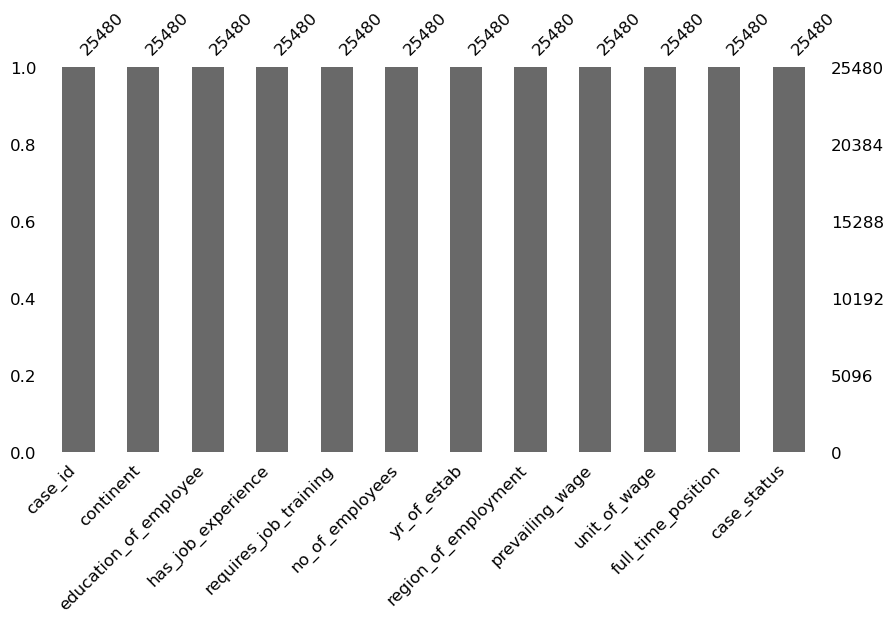

In [12]:
import missingno
missingno.bar(df, figsize=(10,5), fontsize=12)

In [13]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


<h5>Exploring the data in detail</h5>

In [15]:
numeric_features = [x for x in df.columns if df[x].dtypes!='O']

categorical_features = [x for x in df.columns if df[x].dtypes=='O'] 

In [16]:
numeric_features

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

In [17]:
categorical_features

['case_id',
 'continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

In [18]:
#print columns
print('We have {} numerical features :{}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical_features :{}'.format(len(categorical_features), categorical_features))

We have 3 numerical features :['no_of_employees', 'yr_of_estab', 'prevailing_wage']

We have 9 categorical_features :['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [19]:
df['education_of_employee'].value_counts()

Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64

In [20]:
# proportion of count data on categorical features.
for i in categorical_features:
    print(df[i].value_counts())
    print('***************************')

EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
***************************
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
***************************
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
***************************
Y    14802
N    10678
Name: has_job_experience, dtype: int64
***************************
N    22525
Y     2955
Name: requires_job_training, dtype: int64
***************************
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
***************************
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_

In [21]:
# proportion of count data on categorical features.
for i in categorical_features:
    print(df[i].value_counts(normalize=True)*100)
    print()
    print('***************************')

EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: case_id, Length: 25480, dtype: float64

***************************
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: continent, dtype: float64

***************************
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: education_of_employee, dtype: float64

***************************
Y    58.092622
N    41.907378
Name: has_job_experience, dtype: float64

***************************
N    88.402669
Y    11.597331
Name: requires_job_training, dtype: float64

***************************
Northeast    28.237834
South        27.539246
West         25.847724
Midwest      16.

**Insights**
- `Case_id` have uniques values for each column which can be dropped as it of no importance
- `continet` column is highly biased towards asia. hence we can combine other catgeories to form a single category
- `unit_of-wage` seems to be an important column as most of them are yearly contracts

# Univariate Analysis 
- only doing single features on numerical features

In [22]:
numeric_features

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

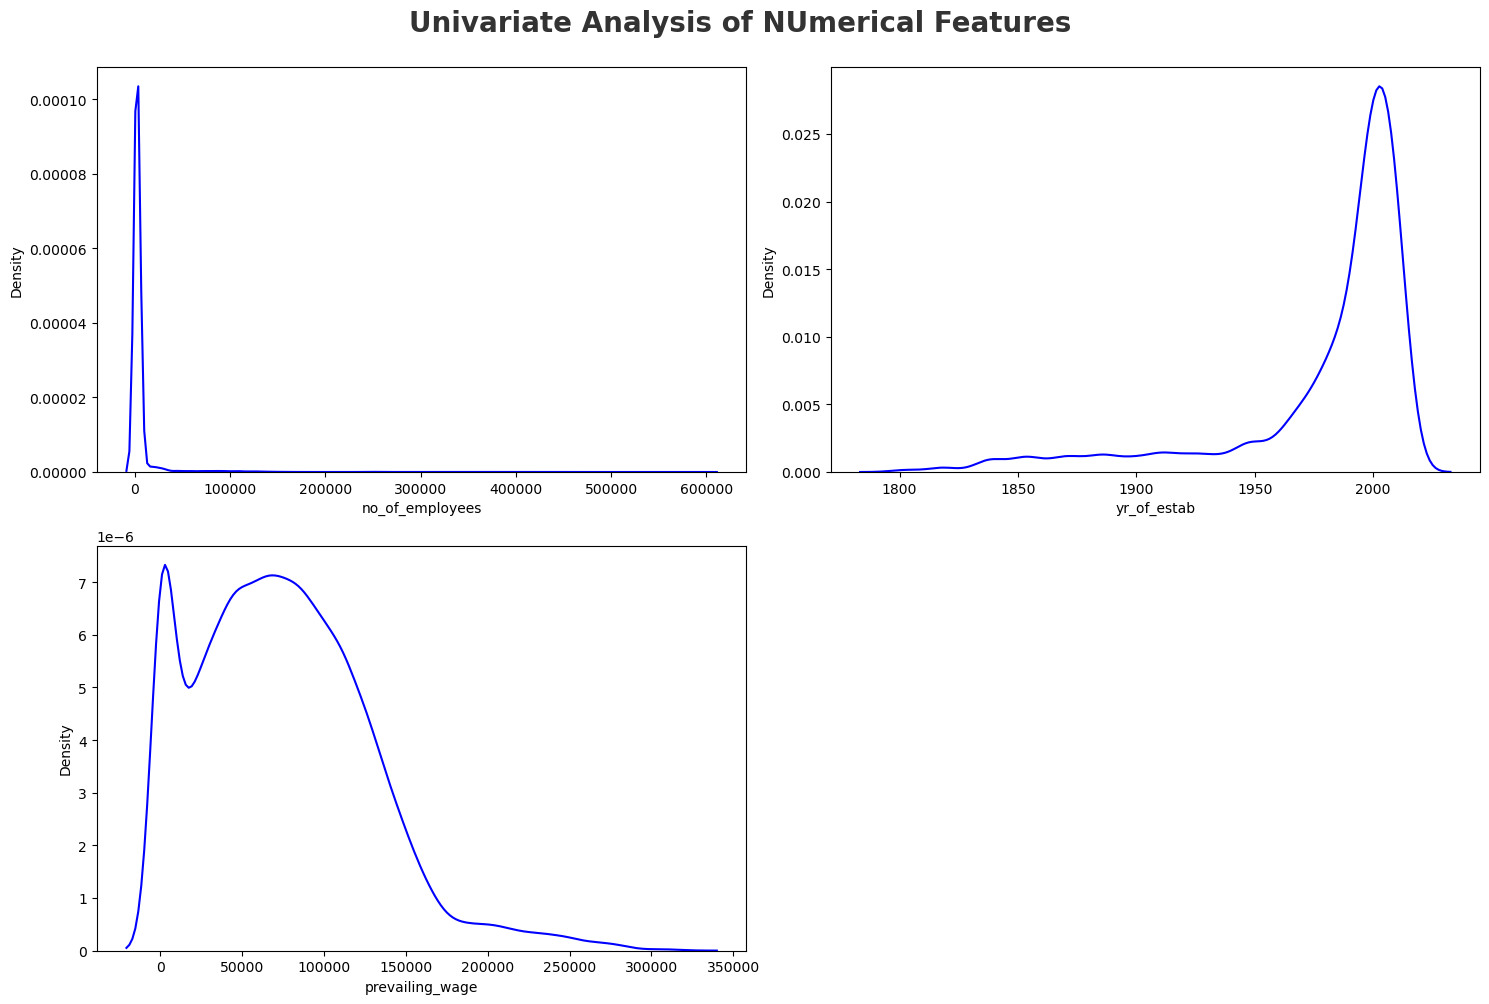

In [23]:
plt.figure(figsize=(15,10))

plt.suptitle('Univariate Analysis of NUmerical Features ', fontsize=20, fontweight='bold', alpha= 0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(2,2, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    
#plt.savefig('path')

In [24]:
categorical_features

['case_id',
 'continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

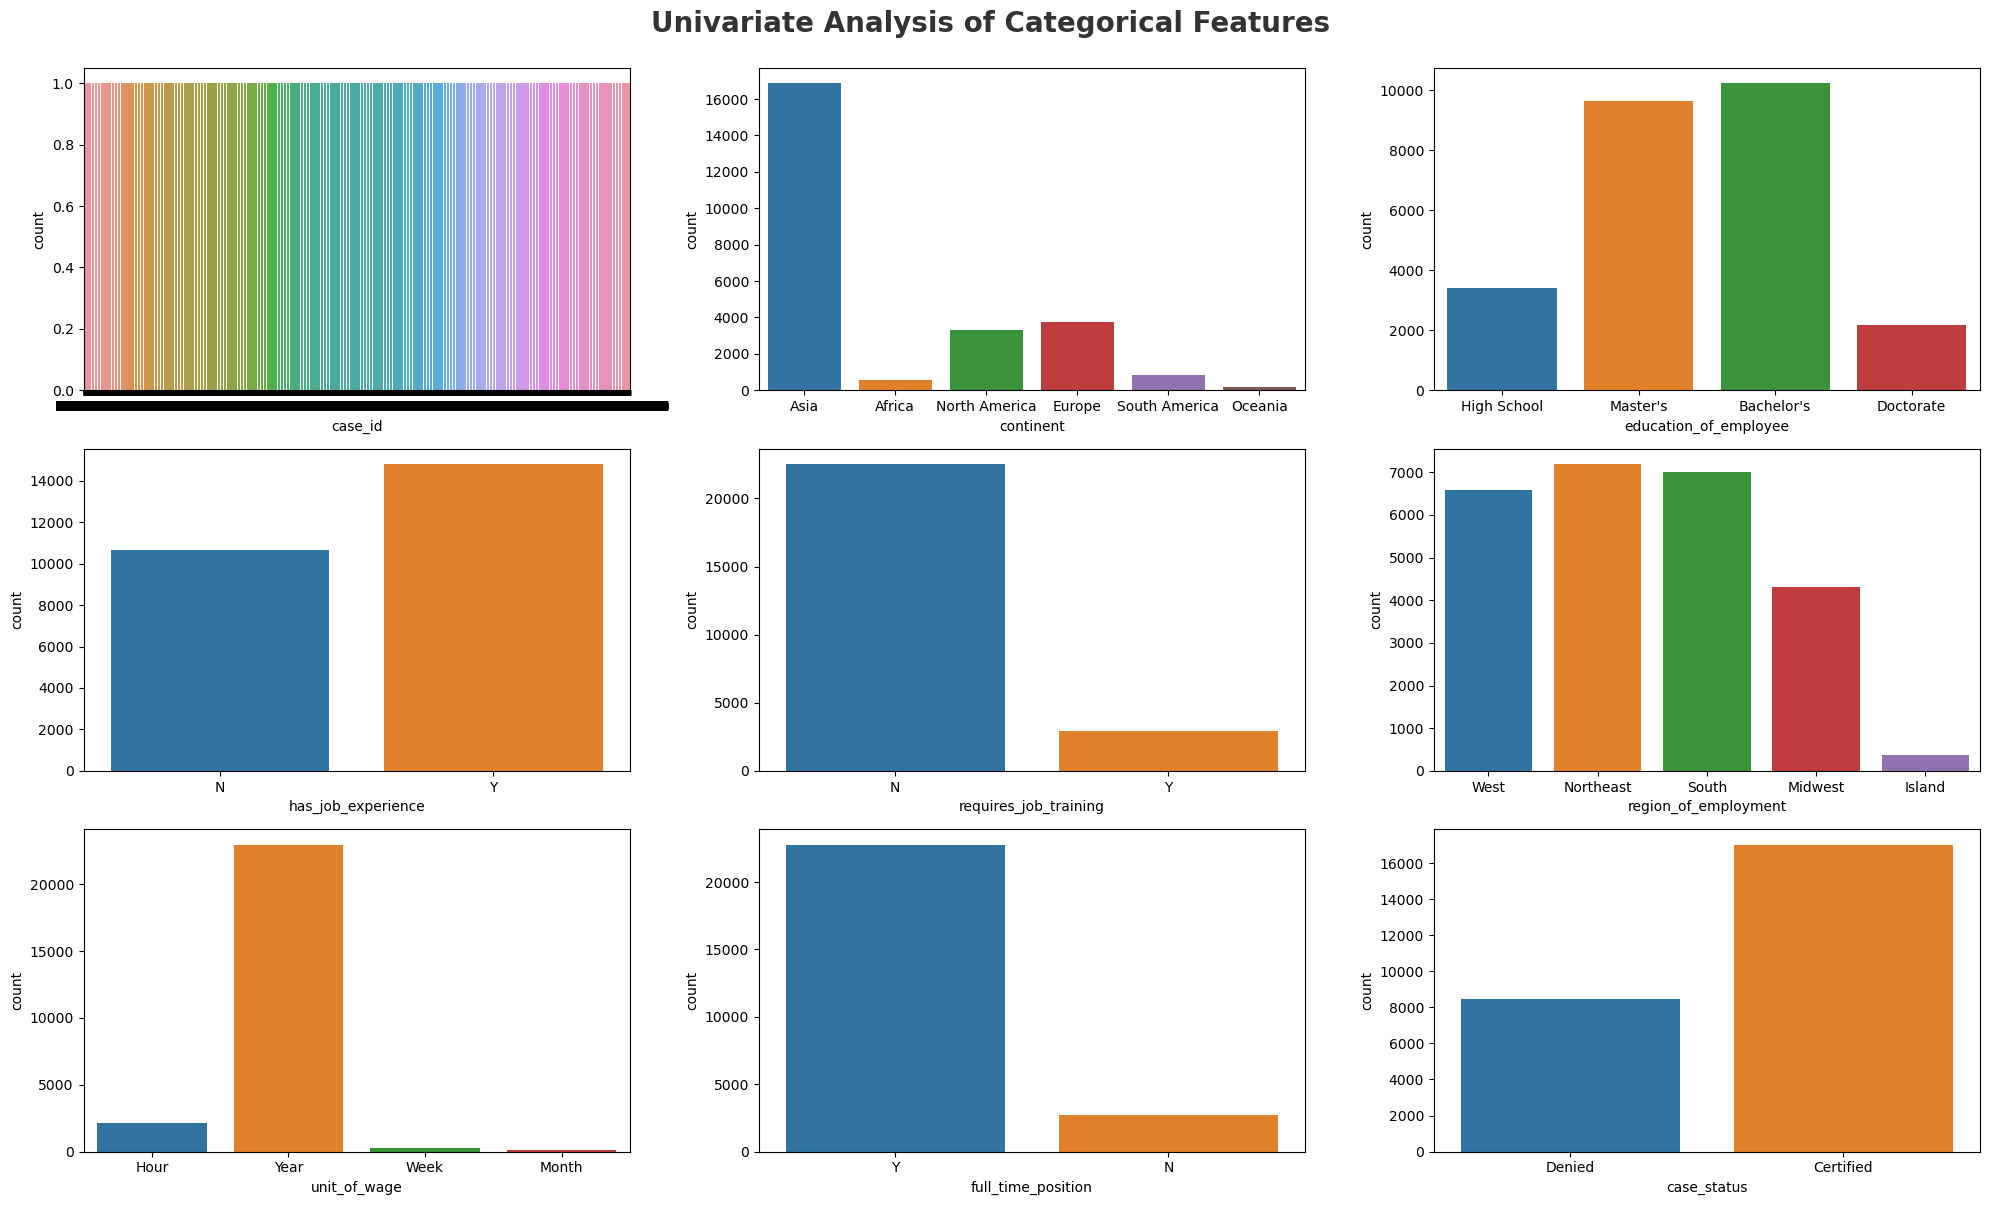

In [25]:
#same doing for categorical features:
#categorical_features.remove('case_id')


plt.figure(figsize=(20,12))

plt.suptitle('Univariate Analysis of Categorical Features ', fontsize=20, fontweight='bold', alpha= 0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()
    
#plt.savefig('./images/Univariate_Cat.png')

### Multivariate Analysis

In [26]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 0 discrete features : []

We have 3 continuous_features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


# Check Multicollinearity in Numerical features

In [27]:
df[(list(df.columns)[1:])].corr()

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


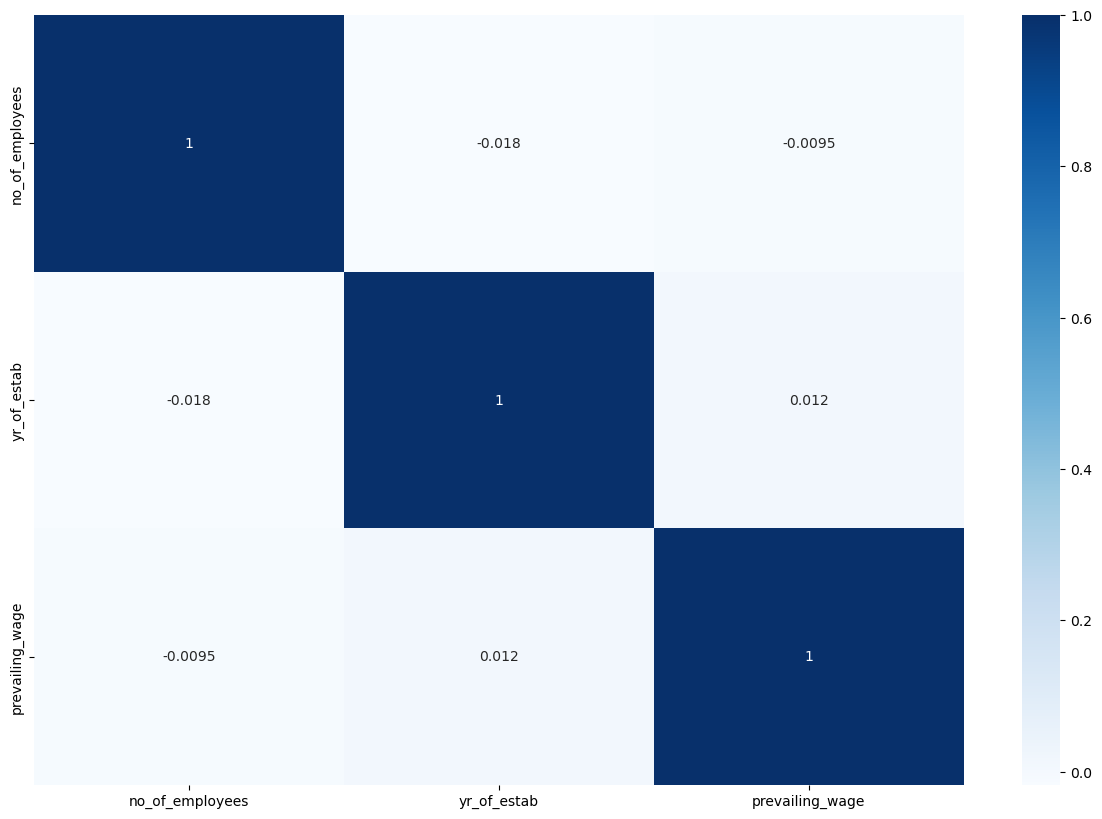

In [28]:
df1=df.copy()
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="Blues", annot=True)
plt.show()

**Insights**
- There is no multicollinearity between variables

# Check Multicollinearity for Categorical features
- A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

- A chi-square statistic is one way to show a relationship between two categorical variables.

- Here we test correlation of Categorical columns with Target column i.e case_status

Null Hypothesis (): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis (): The Feature and Target column are not independent (Correalted)

In [29]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
        chi2_test.append('Accept Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,case_id,Fail to Reject Null Hypothesis
1,continent,Accept Null Hypothesis
2,education_of_employee,Accept Null Hypothesis
3,has_job_experience,Accept Null Hypothesis
4,requires_job_training,Fail to Reject Null Hypothesis
5,region_of_employment,Accept Null Hypothesis
6,unit_of_wage,Accept Null Hypothesis
7,full_time_position,Accept Null Hypothesis
8,case_status,Accept Null Hypothesis


**Requires job training is highly correlated to target column**

In [30]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


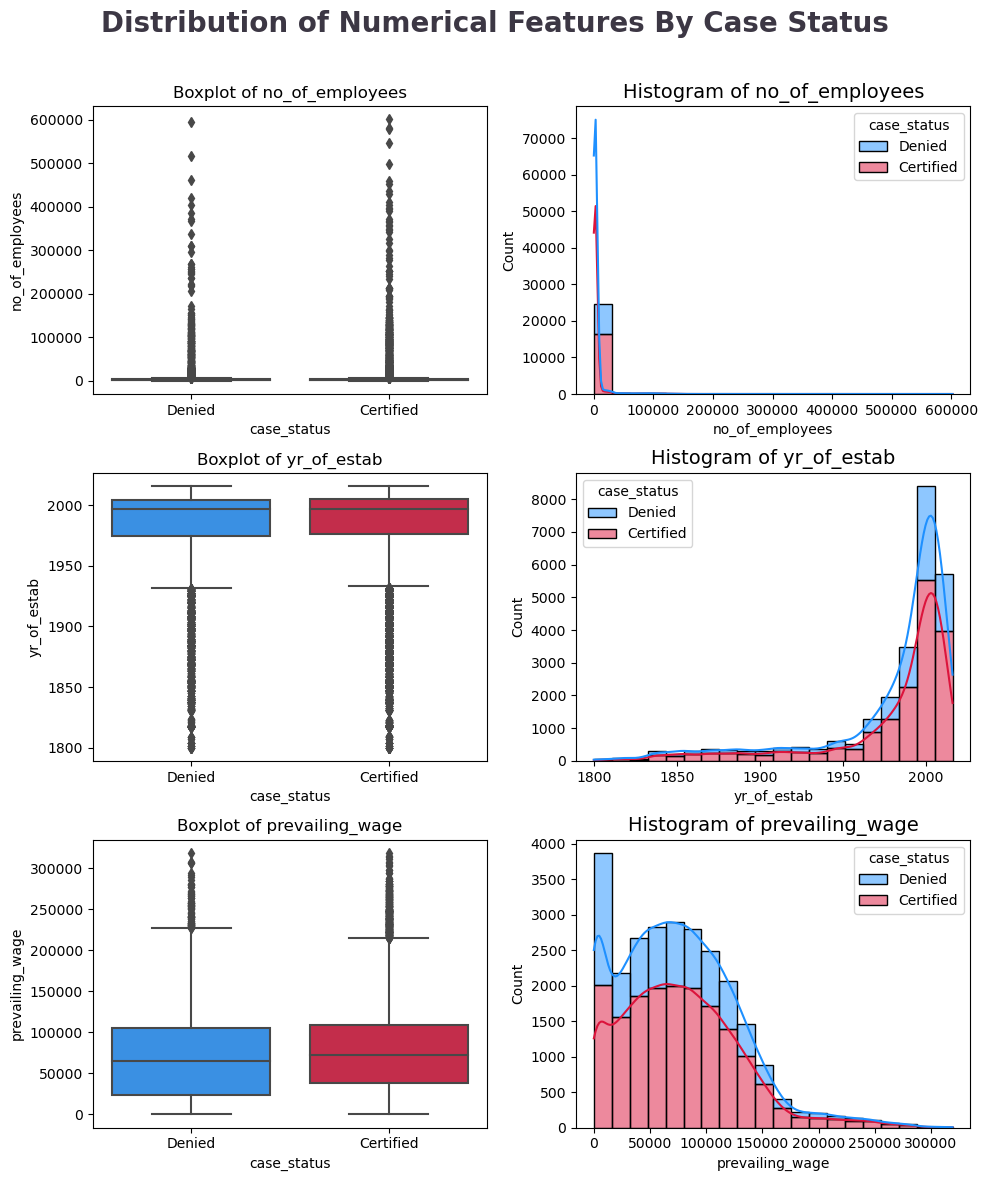

In [31]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Distribution of Numerical Features By Case Status', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(continues_features):   
    sns.boxplot(data=df, x='case_status', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.savefig('images/multivariate_num.png')

**Initial Analysis Report**
- No of Employees has many outliers which can be Handled in Feature Engineering and no_of_employees is Right Skewed.
- yr_of_estab is left skewed and some outliers below the lower bound of Box plot.
- prevailing_wage is right skewed with outliers above upper bound of box plot.
- There are No missing values in the dataset.
- The case_id column can be deleted because each row has unique values.
- The case_status column is the target to predict.
- In the Categorical column, features can be made Binary numerical in feature Encoding

4. Visualization
4.1 Visualize the Target Feature

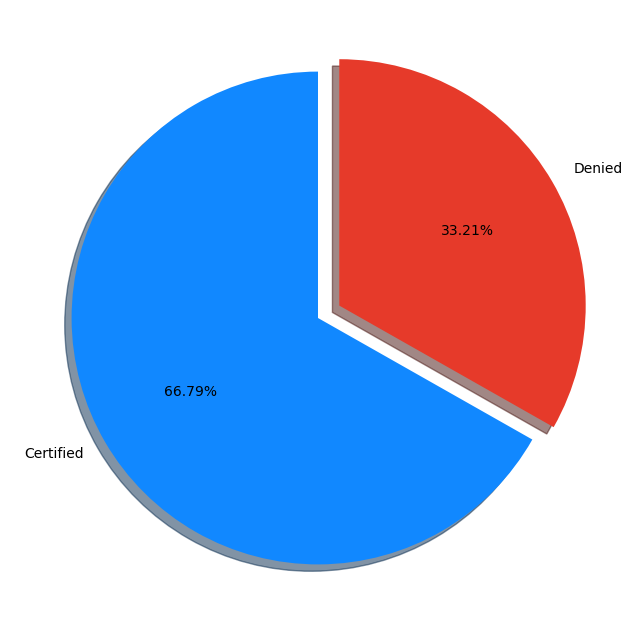

In [32]:
percentage = df.case_status.value_counts(normalize=True)*100
labels = ["Certified","Denied"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()